In [3]:
## Abhiram V Kakuturu
## Basketball-Reference Win-Share on Minutes Played // [8-21-20]
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

## Request advanced stats data and clean up

url = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"
page = requests.get(url)

soup = BeautifulSoup(page.content, 'lxml')
table = soup.find_all('table')[0]
df = (pd.read_html(str(table)))[0]

# Spring cleaning
df = df[df['Tm']!='TOT']
df = df[df['Rk']!='Rk']
df = df.drop(columns=["Unnamed: 19", "Unnamed: 24"])
for i in range(5, len(df.columns)):
    col = df.columns[i]
    df[col] = df[col].astype('float')

In [41]:
## Probably unnecessary
# Win-Shares x Minutes Played
WSxMP_df = df.filter(items=['WS','MP']).sort_index()

# Defensive Win-Shares x Minutes Played
DWSxMP_df = df.filter(items=['DWS','MP']).sort_index()

# Offensive Win-Shares x Minutes Played
OWSxMP_df = df.filter(items=['OWS','MP']).sort_index()

# VORP x Minutes Played
VORPxMP_df = df.filter(items=['VORP','MP']).sort_index()

# USG x Minutes Played
USGxMP_df = df.filter(items=['USG%','MP']).sort_index()

WS by MP --> Linear Regression Line: y_pred=2.50e-03x+-3.45e-01    
Mean Absolute Error: 864.5952622673434
Mean Squared Error: 1261560.2791393264
Root Mean Squared Error: 1123.1920045741629


DWS by MP --> Linear Regression Line: y_pred=1.02e-03x+-1.07e-02    
Mean Absolute Error: 865.5436548223352
Mean Squared Error: 1264728.3835087102
Root Mean Squared Error: 1124.6014331791998


OWS by MP --> Linear Regression Line: y_pred=1.49e-03x+-3.41e-01    
Mean Absolute Error: 865.4732656514383
Mean Squared Error: 1264129.7529081672
Root Mean Squared Error: 1124.3352493398786


VORP by MP --> Linear Regression Line: y_pred=8.64e-04x+-3.15e-01    
Mean Absolute Error: 865.9856175972927
Mean Squared Error: 1265658.0303173198
Root Mean Squared Error: 1125.0146800452517


USG% by MP --> Linear Regression Line: y_pred=2.48e-03x+1.63e+01    
Mean Absolute Error: 848.5649894909945
Mean Squared Error: 1233177.9831471269
Root Mean Squared Error: 1110.4854718307336




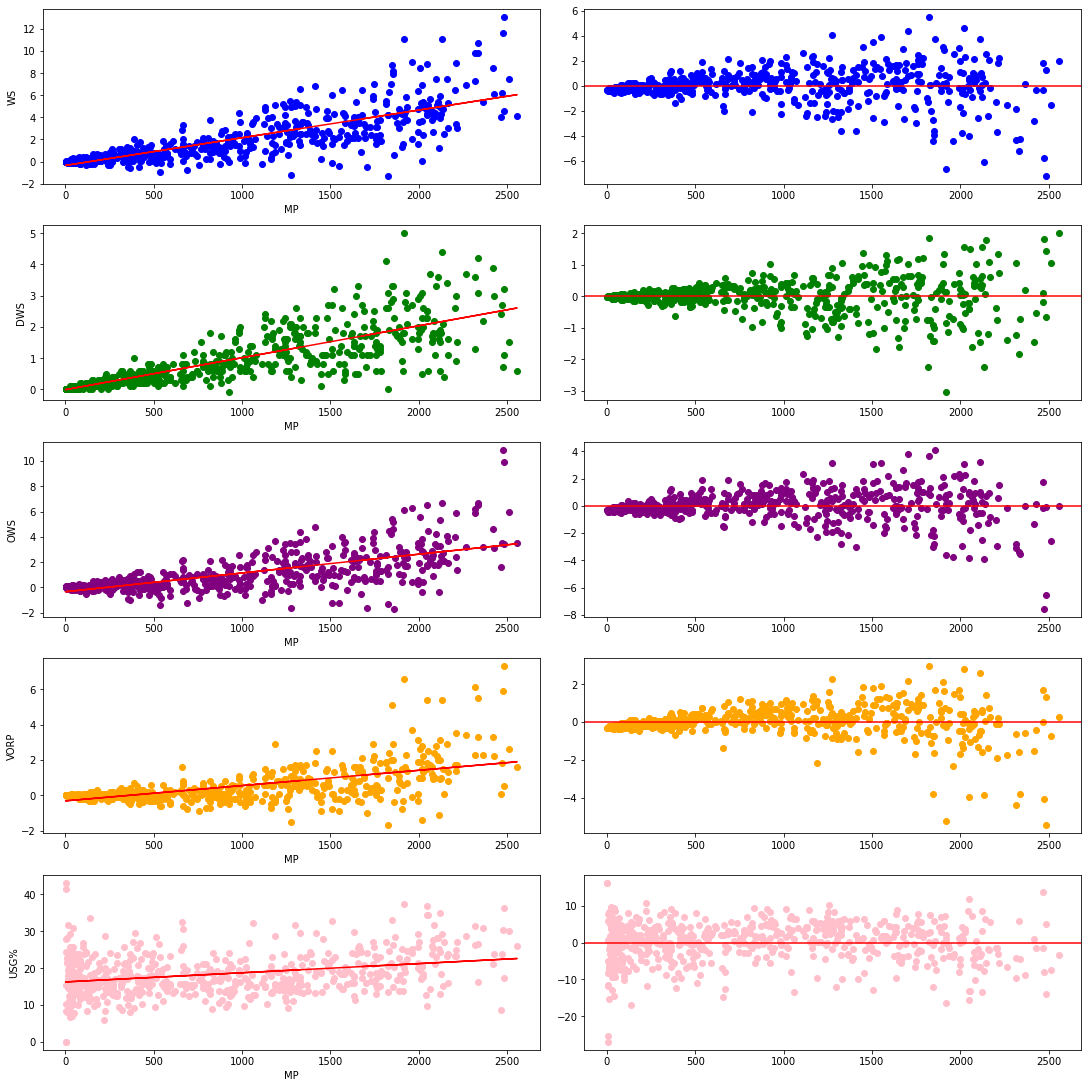

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
lr = LinearRegression()
x = df['MP'].values.reshape(-1,1)
colors = ['blue', 'green', 'purple', 'orange', 'pink']

stat_list = ['WS','DWS','OWS','VORP','USG%']
fig, ax = plt.subplots(len(stat_list),2,constrained_layout=True,figsize=(15,15))
## Building and Plotting Regressions
for i in range(0,len(stat_list)):
    y = df[stat_list[i]].values.reshape(-1,1)

    # Build regression line
    lr.fit(x,y)
    m = lr.coef_[0][0]
    b = lr.intercept_[0]
    y_pred = m*x+b
    
    # Plot regression data & regression in one plot
    ax[i,0].plot(x,y_pred,c='red')
    ax[i,0].scatter(x, y, c=colors[i])
    ax[i,0].set(xlabel='MP', ylabel=stat_list[i])
    
    # Plot residuals and horizontal line at y=0
    residuals = y_pred - y
    lr.fit(x, residuals)
    ax[i,1].scatter(x,residuals,c=colors[i])
    ax[i,1].axhline(c='red')
    
    sm = "{:.2e}".format(m)
    sb = "{:.2e}".format(b)
    reg_label="y_pred="+sm+"x"+"+"+sb
    print(stat_list[i]+" by MP --> Linear Regression Line: " + reg_label + "    ")
    print('Mean Absolute Error:', metrics.mean_absolute_error(df['MP'], y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(df['MP'], y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['MP'], y_pred)))
    print('\n')

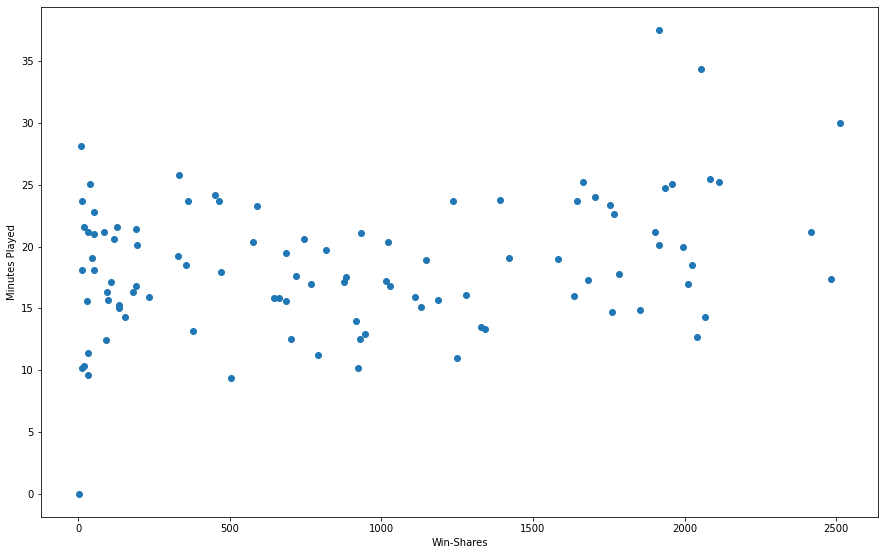

In [28]:
## Get a reasonable understanding of what the data looks like
plt.figure("WS-MP-ex",figsize=(15, 15 / 1.6))
plt.xlabel('Win-Shares')
plt.ylabel('Minutes Played')

plt.scatter(df['MP'][0:100],df['USG%'][0:100])

Regression: pred_WS = m * MP + b

Coefficients: m = 2.50e-03
b= -3.45e-01


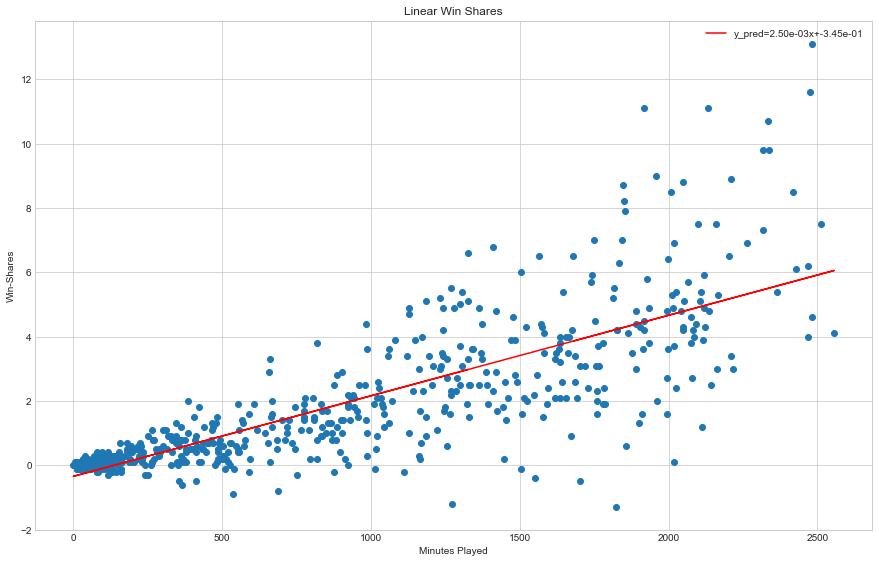

In [444]:
plt.figure("WS-MP",figsize=(15, 15 / 1.6))
plt.ylabel("Win-Shares")
plt.xlabel("Minutes Played")
plt.title("Linear Win Shares")

## Simple linear regression
x = WSxMP_df['MP'].values.reshape(-1,1)
y = WSxMP_df['WS'].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)
m = lr.coef_[0][0]
b = lr.intercept_[0]
y_pred = m*x+b

sm = "{:.2e}".format(m)
sb = "{:.2e}".format(b)

reg_label="y_pred="+sm+"x"+"+"+sb

plt.scatter(df['MP'],df['WS'])
plt.plot(x,y_pred,c='red', label=reg_label)
plt.legend()
print("Regression: pred_WS = m * MP + b\n")
print("Coefficients: m = "+sm+"\nb= "+sb)

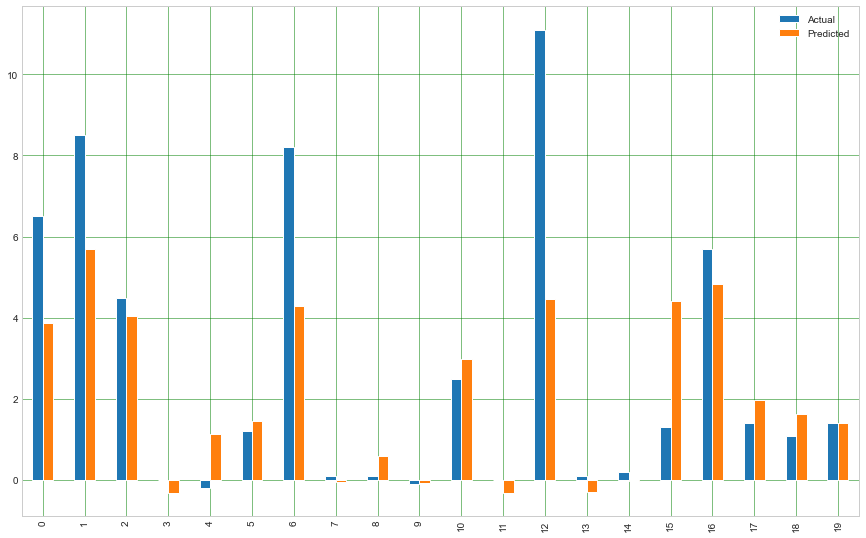

Mean Absolute Error: 864.5952622673434
Mean Squared Error: 1261560.2791393264
Root Mean Squared Error: 1123.1920045741629


In [452]:
## Bar chart of actual and predicted values 
residual_df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
residual_df

df1 = residual_df.head(20)
df1.plot(kind='bar',figsize=(15,15/1.6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(df['MP'], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(df['MP'], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['MP'], y_pred)))

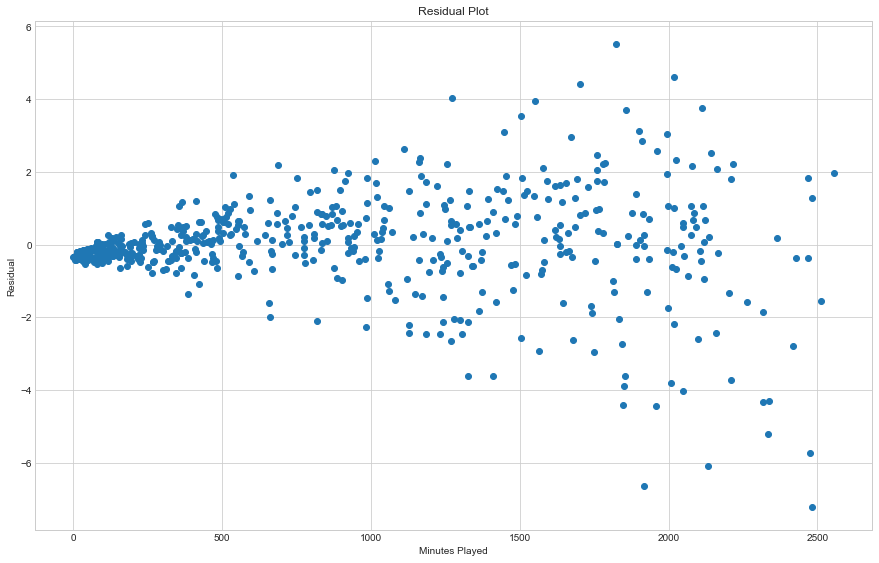

In [453]:
## RMSE is massive, so we'll visually investigate
## Observed divergence of residuals as MP increases suggests non-linear relationship
plt.figure("Residuals",figsize=(15,15/1.6))
residuals = y_pred - y

plt.title("Residual Plot")
plt.xlabel("Minutes Played")
plt.ylabel("Residual")
plt.scatter(x, residuals)

plt.show()

<Figure size 1080x675 with 0 Axes>

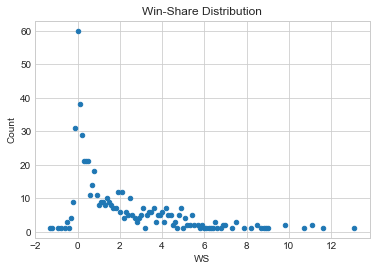

In [347]:
## EXTRA
## Explore the distribution of Win-Shares
dist_s = WSxMP_df['WS'].value_counts()
dist_df = pd.DataFrame(data={'WS': s.index, 'Freq': s.values})
dist_df.sort_values(by=['Freq'])

plt.figure("WS-MP",figsize=(15, 15/1.6))
dist_df.columns = ['WS', 'Count']
dist_df.plot(kind='scatter', x='WS', y='Count')
plt.title('Win-Share Distribution')
plt.show()

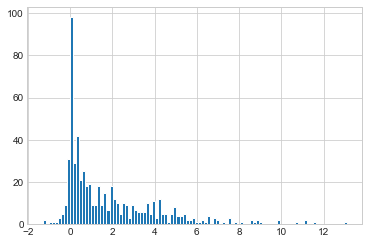

In [352]:
hist = WSxMP_df['WS'].hist(bins=100)